# Linear Regression Model on E-Commerce Clients
------

This project aims to identify the primary factors influencing a customer's annual expenditure with the E-commerce company.  

In this project we work with a dataset [available on Kaggle](https://www.kaggle.com/iyadavvaibhav/ecommerce-customer-device-usage/notebooks). The data includes information about customers of an e-commerce website, including the following:
- Avg. Session Length: Average session of in-store style advice sessions.
- Time on App: Average time spent on App in minutes
- Time on Website: Average time spent on Website in minutes
- Length of Membership: How many years the customer has been a member.

In this project, we suppose that the company is trying figure out which of their services and platforms has a significant impact on increasing their yearly memberships. They are trying to decide on which platforms and services they should focus on in order to drive their sales and revenue. We are here to help them make a data-driven decision

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
df = pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
2,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
3,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
4,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448


In [8]:
df.shape

(499, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 499 non-null    object 
 1   Address               499 non-null    object 
 2   Avatar                499 non-null    object 
 3   Avg. Session Length   499 non-null    float64
 4   Time on App           499 non-null    float64
 5   Time on Website       499 non-null    float64
 6   Length of Membership  499 non-null    float64
 7   Yearly Amount Spent   499 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,499.0,33.055452,0.992272,29.532429,32.347137,33.085298,33.713317,36.139662
Time on App,499.0,12.054378,0.994314,8.508152,11.388629,11.984418,12.755623,15.126994
Time on Website,499.0,37.060028,1.011460,33.913847,36.346012,37.067090,37.716878,40.005182
Length of Membership,499.0,3.535204,0.999520,0.269901,2.933598,3.535088,4.127420,6.922689
Yearly Amount Spent,499.0,499.528686,79.248872,256.670582,445.406013,499.140152,549.496082,765.518462


In [11]:
df[df.duplicated()]

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


## Plotting the Data-distribution of the Features

In [12]:
sns.set()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

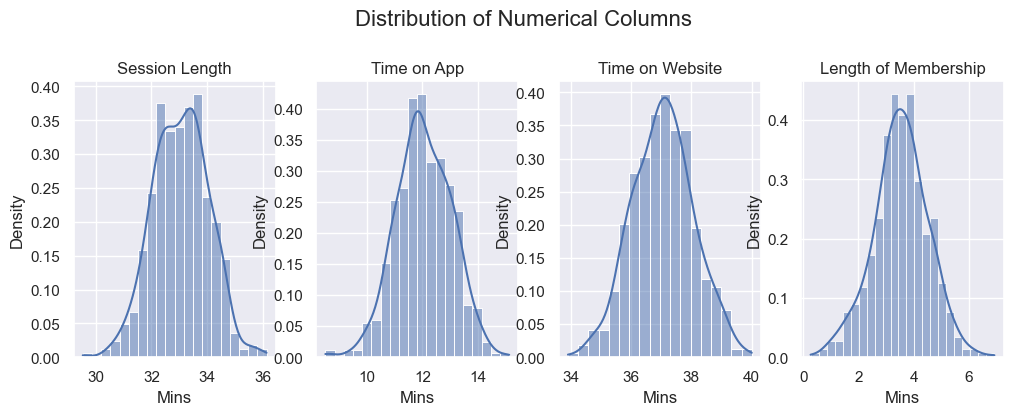

In [13]:
fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(12,4))

sns.histplot(df['Avg. Session Length'], kde=True, stat='density', ax=axes[0] )
axes[0].set_title('Session Length')
axes[0].set_xlabel('Mins')

sns.histplot(df['Time on App'], kde=True, stat='density', ax=axes[1] )
axes[1].set_title('Time on App')
axes[1].set_xlabel('Mins')

sns.histplot(df['Time on Website'], kde=True, stat='density', ax=axes[2] )
axes[2].set_title('Time on Website')
axes[2].set_xlabel('Mins')

sns.histplot(df['Length of Membership'], kde=True, stat='density', ax=axes[3] )
axes[3].set_title('Length of Membership')
axes[3].set_xlabel('Mins')

fig.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.subplots_adjust(top=0.8)
plt.tight_layout


  
  
  ## Plotting the scatter plot of Target Value and Features

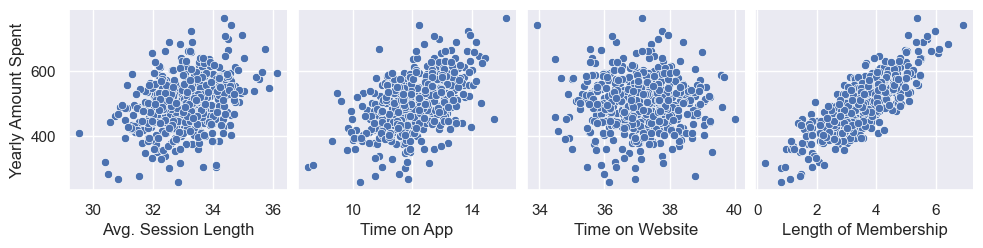

In [14]:
sns.pairplot(data=df, y_vars=['Yearly Amount Spent'],
             x_vars= ['Avg. Session Length','Time on App','Time on Website','Length of Membership'])

----
  ## Data Pre-Processing  


Separating the features and target values

In [15]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [16]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,33.000915,11.330278,37.110597,4.104543
2,34.305557,13.717514,36.721283,3.120179
3,33.330673,12.795189,37.536653,4.446308
4,33.871038,12.026925,34.476878,5.493507


In [17]:
y[0:5]

0    587.951054
1    487.547505
2    581.852344
3    599.406092
4    637.102448
Name: Yearly Amount Spent, dtype: float64

-----
## Importing the Model and Training

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### Model Training

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

### Model Prediction

In [22]:
y_predict = lr.predict(X_test)
y_predict[0:5]

array([652.61233826, 400.99727946, 524.89475928, 449.40797301,
       591.3850904 ])

----
## Calculating Performance on Test Set

### Check for -  
Mean Absolute Error(MAE)  
Mean Squared Error(MSE)  
Root Mean Squared Error (RMSE)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
mae = mean_absolute_error(y_predict,y_test)
mse = mean_squared_error(y_predict,y_test)
rmse = np.sqrt(mse)

In [25]:
mae

8.604287887220492

In [26]:
rmse

10.792397965535825

In [27]:
df['Yearly Amount Spent'].mean()

499.52868576553107

### Plotting Residuals  
To check if if Linear Regression was a valid model choice.  
Residual = predicted value - true value  
Plot - true value VS residual

In [28]:
residual = y_predict - y_test

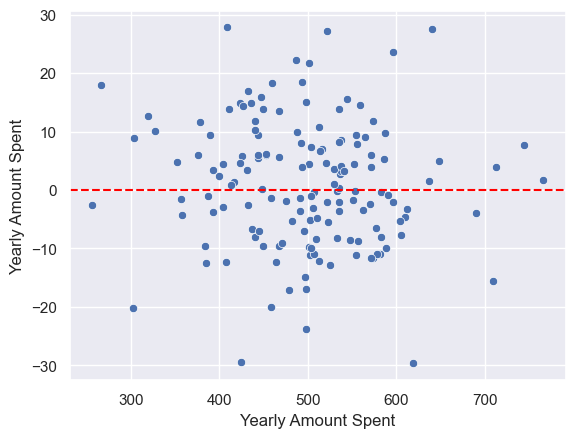

In [29]:
sns.scatterplot(x=y_test, y=residual)
plt.axhline(color='red', ls='--')

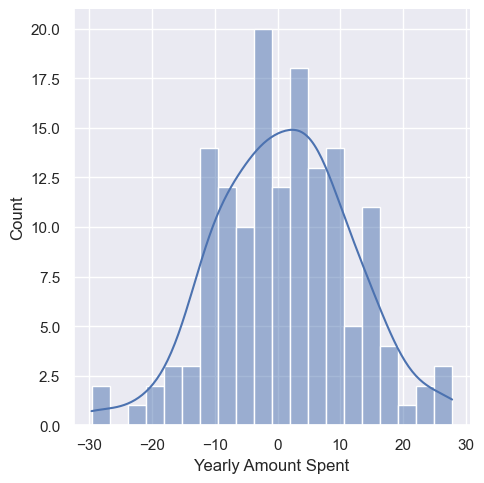

In [30]:
sns.displot(data=residual, kde=True, bins=20)

------
## Retraining model on Full Data  
After checking the performance of our model on test and train data, we need to retrain our model on the entire dataset  
in order to make it ready for deployment

In [31]:
final_model = LinearRegression()

In [32]:
final_model.fit(X,y)

LinearRegression()

In [33]:
y_hat = final_model.predict(X)

In [34]:
y_hat[0:5]

array([594.76560202, 505.16813864, 570.44021619, 591.63799175,
       638.98337383])

#### Check Residual Plot again  
(True Value - Predicted Value)

In [35]:
residual_f = y - y_hat

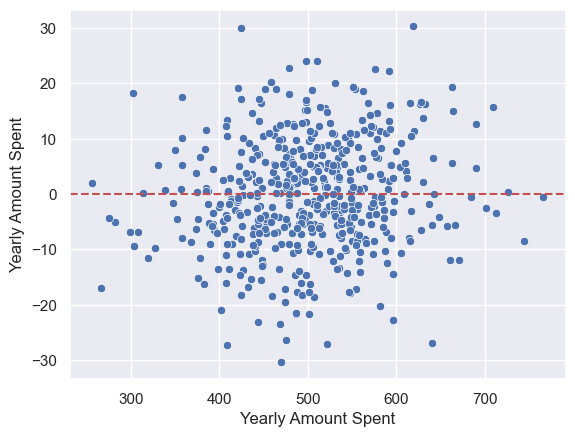

In [36]:
sns.scatterplot(x=y, y=residual_f)
plt.axhline(color='r', ls='--')

### Check the values of Coefficients/Parameters

In [37]:
final_model.coef_

array([25.76099304, 38.73259587,  0.43173433, 61.5956276 ])

In [38]:
coef_df = pd.DataFrame(data=final_model.coef_, index=X.columns, columns=['Coefficient'])
coef_df

,Coefficient
Avg. Session Length,25.760993
Time on App,38.732596
Time on Website,0.431734
Length of Membership,61.595628


## Predicting output with new data  
Checking and validating the model performance based on a new set of input data that the model has never seen before  
True Output - 392.2049334

In [39]:
new_data = (31.92627203,11.10946073,37.26895887,2.664034182)
new_array = np.asarray(new_data).reshape(1,-1)

In [40]:
new_pred = final_model.predict(new_array)

In [41]:
new_pred

array([380.27075925])

### Calculating Accuracy

In [42]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [48]:
accuracy = 100 - mean_absolute_percentage_error(y, y_hat)
print(f'The Accuracy of our model is {accuracy}')

The Accuracy of our model is 98.38715557452791


### Accuracy = 98.3%

--------
# Findings:-

From the coefficients obtained through linear regression analysis, we can draw several conclusions about the relationship between the features and the target variable (Yearly Amount Spent) in the context of the E-commerce website:

* Length of Membership has the strongest positive impact: With a coefficient of 61.595628, it indicates that for each additional year a customer remains a member, there is an increase of approximately $61.60 in the yearly amount spent on the website. This suggests that customer loyalty plays a significant role in driving spending.  

* Time on App also has a strong positive impact: The coefficient of 38.732596 suggests that for each additional minute spent on the app, there is an increase of approximately $38.73 in the yearly amount spent. This implies that the app is effective in engaging customers and encouraging them to spend more.  

* Avg. Session Length has a moderate positive impact: With a coefficient of 25.760993, it suggests that longer average session lengths for in-store style advice sessions lead to an increase in yearly spending. This indicates that providing quality in-store advice sessions can positively influence customer spending behavior.  

* Time on Website has the weakest impact: The coefficient of 0.431734 indicates that the impact of time spent on the website on yearly spending is relatively low compared to the other features. This could suggest that the website may not be as effective as the app in driving sales or engaging customers. Another reason might be that website users are getting converted to app-users because of the convinience and ecosystem of an app based service. 

Overall, the model suggests that customer engagement through the app and fostering long-term loyalty are key drivers of spending on the E-commerce platform. The company may want to focus on enhancing the app experience and implementing strategies to retain and reward loyal customers to maximize revenue. Additionally, the company should analyse its website performance on a more granular level in order to increase its effectiveness. The website is always going to be a valuable asset and the company should take every measure to maintain it and adopt new features and services to match the current market standards.